In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pm-79926279-at-08-13-2025-21-16-51/__script__.py
/kaggle/input/pm-79926279-at-08-13-2025-21-16-51/__results__.html
/kaggle/input/pm-79926279-at-08-13-2025-21-16-51/input_requirements.txt
/kaggle/input/pm-79926279-at-08-13-2025-21-16-51/__script__.ipynb
/kaggle/input/pm-79926279-at-08-13-2025-21-16-51/__output__.json
/kaggle/input/pm-79926279-at-08-13-2025-21-16-51/custom.css
/kaggle/input/binance-spot-btcusdt-1m-from-2017-08-to-2023-03/BTCUSDT-1m-2017-08-to-2023-03 (Binance SPOT).csv
/kaggle/input/btcusdt-1m-2023-11/BTCUSDT-1m-2023-11.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import math
from sklearn.ensemble import RandomForestClassifier
import joblib
import gc
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.layers import Dense, LSTM, Dropout

In [3]:
data_BTC = pd.read_csv('/kaggle/input/btcusdt-1m-2023-11/BTCUSDT-1m-2023-11.csv')
data_BTC.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1698796800000,34639.78,34656.65,34636.13,34654.62,27.01885,1698796859999,9.361249e+05,979,8.84087,3.063105e+05,0
1,1698796860000,34654.62,34668.05,34627.77,34627.78,84.41150,1698796919999,2.925776e+06,2203,54.60249,1.892683e+06,0
2,1698796920000,34627.77,34637.36,34620.58,34637.35,24.53880,1698796979999,8.498032e+05,1106,9.97175,3.453191e+05,0
3,1698796980000,34637.35,34637.36,34601.66,34608.71,43.83505,1698797039999,1.517318e+06,1594,13.36925,4.627567e+05,0
4,1698797040000,34608.72,34608.72,34578.42,34601.43,52.56841,1698797099999,1.818516e+06,1822,20.94615,7.245044e+05,0


In [4]:
# Convert 'Open Time' and 'Close Time' from unix timestamp to human-readable time
data_BTC['open_time'] = pd.to_datetime(data_BTC['open_time'], unit='ms')
data_BTC['close_time'] = pd.to_datetime(data_BTC['close_time'], unit='ms')

# Display the first 5 rows of the dataframe
data_BTC.head()


,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,2023-11-01 00:00:00,34639.78,34656.65,34636.13,34654.62,27.01885,2023-11-01 00:00:59.999,9.361249e+05,979,8.84087,3.063105e+05,0
1,2023-11-01 00:01:00,34654.62,34668.05,34627.77,34627.78,84.41150,2023-11-01 00:01:59.999,2.925776e+06,2203,54.60249,1.892683e+06,0
2,2023-11-01 00:02:00,34627.77,34637.36,34620.58,34637.35,24.53880,2023-11-01 00:02:59.999,8.498032e+05,1106,9.97175,3.453191e+05,0
3,2023-11-01 00:03:00,34637.35,34637.36,34601.66,34608.71,43.83505,2023-11-01 00:03:59.999,1.517318e+06,1594,13.36925,4.627567e+05,0
4,2023-11-01 00:04:00,34608.72,34608.72,34578.42,34601.43,52.56841,2023-11-01 00:04:59.999,1.818516e+06,1822,20.94615,7.245044e+05,0


In [5]:
data_BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open_time               43200 non-null  datetime64[ns]
 1   open                    43200 non-null  float64       
 2   high                    43200 non-null  float64       
 3   low                     43200 non-null  float64       
 4   close                   43200 non-null  float64       
 5   volume                  43200 non-null  float64       
 6   close_time              43200 non-null  datetime64[ns]
 7   quote_volume            43200 non-null  float64       
 8   count                   43200 non-null  int64         
 9   taker_buy_volume        43200 non-null  float64       
 10  taker_buy_quote_volume  43200 non-null  float64       
 11  ignore                  43200 non-null  int64         
dtypes: datetime64[ns](2), float64(8), int64(2)
mem

In [6]:
data_BTC.describe()



,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
count,43200,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200,4.320000e+04,43200.000000,43200.000000,4.320000e+04,43200.0
mean,2023-11-15 23:59:30,36484.246079,36494.056139,36474.090687,36484.318143,24.437282,2023-11-16 00:00:29.999000320,8.909825e+05,856.609398,11.922627,4.346814e+05,0.0
min,2023-11-01 00:00:00,34130.380000,34143.320000,34097.390000,34130.370000,0.635830,2023-11-01 00:00:59.999000,2.398087e+04,117.000000,0.109390,3.999319e+03,0.0
25%,2023-11-08 11:59:45,35415.507500,35427.335000,35403.470000,35415.625000,8.191688,2023-11-08 12:00:44.999000064,2.983840e+05,446.000000,3.086130,1.126016e+05,0.0
50%,2023-11-15 23:59:30,36729.990000,36742.010000,36717.180000,36729.995000,14.986435,2023-11-16 00:00:29.999000064,5.469047e+05,643.000000,6.842000,2.491379e+05,0.0
75%,2023-11-23 11:59:15,37341.112500,37349.567500,37332.180000,37341.112500,27.057782,2023-11-23 12:00:14.999000064,9.871458e+05,958.000000,13.472105,4.914827e+05,0.0
max,2023-11-30 23:59:00,38384.080000,38450.000000,38341.110000,38384.080000,1420.125600,2023-11-30 23:59:59.999000,5.332669e+07,37270.000000,1000.204570,3.754420e+07,0.0
std,NaN,1082.359381,1082.382673,1082.390847,1082.339698,39.178513,NaN,1.427301e+06,958.613197,21.271573,7.773456e+05,0.0


In [7]:
data_BTC.isnull().sum()

open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
ignore                    0
dtype: int64

In [8]:
data_BTC['Return'] = data_BTC['close'].pct_change()

# Calculate the 7-period moving average
data_BTC['MA7'] = data_BTC['close'].rolling(window=7).mean()

# Calculate the standard deviation (volatility) over a 7-period timescale
data_BTC['Volatility'] = data_BTC['Return'].rolling(window=7).std()

# Similarly calculate other parameters as well.
data_BTC['Upper_Shadow'] = data_BTC['high'] - np.maximum(data_BTC['close'], data_BTC['open'])
data_BTC['Lower_Shadow'] = np.minimum(data_BTC['close'], data_BTC['open']) - data_BTC['low']
data_BTC['high2low'] = (data_BTC['high'] / data_BTC['low']).replace([np.inf, -np.inf, np.nan], 0.)

In [9]:
data_BTC.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,Return,MA7,Volatility,Upper_Shadow,Lower_Shadow,high2low
0,2023-11-01 00:00:00,34639.78,34656.65,34636.13,34654.62,27.01885,2023-11-01 00:00:59.999,9.361249e+05,979,8.84087,3.063105e+05,0,NaN,NaN,NaN,2.03,3.65,1.000592
1,2023-11-01 00:01:00,34654.62,34668.05,34627.77,34627.78,84.41150,2023-11-01 00:01:59.999,2.925776e+06,2203,54.60249,1.892683e+06,0,-0.000774,NaN,NaN,13.43,0.01,1.001163
2,2023-11-01 00:02:00,34627.77,34637.36,34620.58,34637.35,24.53880,2023-11-01 00:02:59.999,8.498032e+05,1106,9.97175,3.453191e+05,0,0.000276,NaN,NaN,0.01,7.19,1.000485
3,2023-11-01 00:03:00,34637.35,34637.36,34601.66,34608.71,43.83505,2023-11-01 00:03:59.999,1.517318e+06,1594,13.36925,4.627567e+05,0,-0.000827,NaN,NaN,0.01,7.05,1.001032
4,2023-11-01 00:04:00,34608.72,34608.72,34578.42,34601.43,52.56841,2023-11-01 00:04:59.999,1.818516e+06,1822,20.94615,7.245044e+05,0,-0.000210,NaN,NaN,0.00,23.01,1.000876


In [10]:
data_BTC.isnull().sum()


open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
ignore                    0
Return                    1
MA7                       6
Volatility                7
Upper_Shadow              0
Lower_Shadow              0
high2low                  0
dtype: int64

In [11]:


# Drop the rows with NaN values
data_BTC = data_BTC.dropna()



In [12]:


# Check for missing values in the dataframe
data_BTC.isnull().sum()



open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_volume              0
count                     0
taker_buy_volume          0
taker_buy_quote_volume    0
ignore                    0
Return                    0
MA7                       0
Volatility                0
Upper_Shadow              0
Lower_Shadow              0
high2low                  0
dtype: int64

In [13]:
binance_dark = {
    "base_mpl_style": "dark_background",
    "marketcolors": {
        "candle": {"up": "#3dc985", "down": "#ef4f60"},
        "edge": {"up": "#3dc985", "down": "#ef4f60"},
        "wick": {"up": "#3dc985", "down": "#ef4f60"},
        "ohlc": {"up": "green", "down": "red"},
        "volume": {"up": "#247252", "down": "#82333f"},
        "vcedge": {"up": "green", "down": "red"},
        "vcdopcod": False,
        "alpha": 1,
    },
    "mavcolors": ("#ad7739", "#a63ab2", "#62b8ba"),
    "facecolor": "#1b1f24",
    "gridcolor": "#2c2e31",
    "gridstyle": "--",
    "y_on_right": True,
    "rc": {
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.edgecolor": "#474d56",
        "axes.titlecolor": "red",
        "figure.facecolor": "#161a1e",
        "figure.titlesize": "x-large",
        "figure.titleweight": "semibold",
    },
    "base_mpf_style": "binance-dark",
}

In [14]:
def candle_chart(data, label):
    candlestick = go.Figure(data=[go.Candlestick(x=data.index,
                                                 open=data['open'],
                                                 high=data['high'],
                                                 low=data['low'],
                                                 close=data['close'])])

    candlestick.update_layout(
        paper_bgcolor="black", plot_bgcolor="black",
                  margin_l=10, margin_b=0, margin_r=0, margin_t=0,
                 grid_columns=1,grid_rows=1,
        xaxis=dict(title='Time', rangeslider=dict(visible=True)),
        title='{label} Candlestick Chart'.format(label=label),
        yaxis=dict(title='Price in USD', ticksuffix='$')
    )
    candlestick.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
    candlestick.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')

    return candlestick

In [15]:
%matplotlib inline
btc_candle = candle_chart(data_BTC, label="BTC Price")
btc_candle.show()

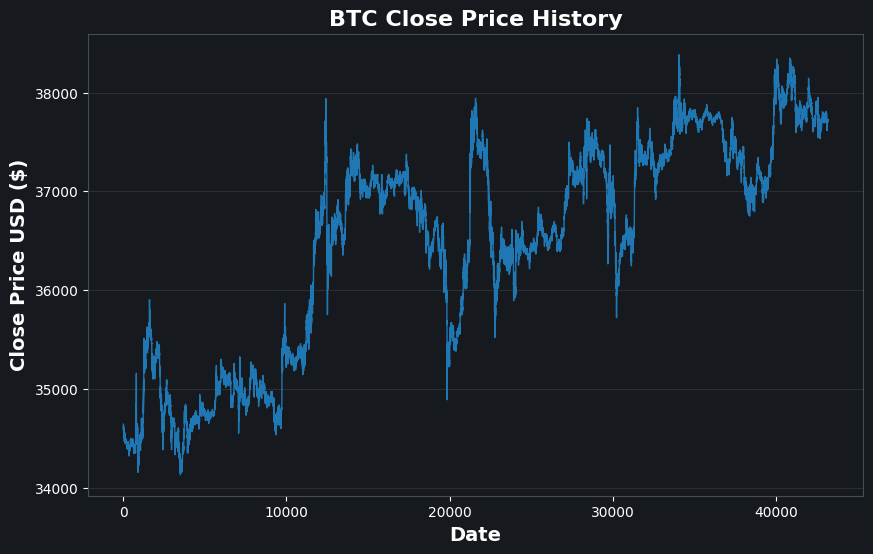

In [16]:
plt.style.use({
    "axes.grid": True,
    "axes.grid.axis": "y",
    "axes.edgecolor": "#474d56",
    "axes.facecolor": "#161a1e",
    "grid.color": "#2c2e31",
    "axes.titlecolor": "red",
    "figure.facecolor": "#161a1e",
    "figure.titlesize": "x-large",
    "figure.titleweight": "semibold",
    "lines.linewidth": 1.0,
    "lines.linestyle": "-",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "legend.edgecolor": "white",
    "legend.facecolor": "#161a1e",
    "legend.fontsize": "medium",
    "legend.shadow": False,
    "text.color": "white"
})
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.title('BTC Close Price History', fontsize=16, fontweight='semibold', color='white')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Close Price USD ($)', fontsize=14, fontweight='bold', color='white')

# Plotting stock 'Close' prices
plt.plot(data_BTC['close'])
plt.show()

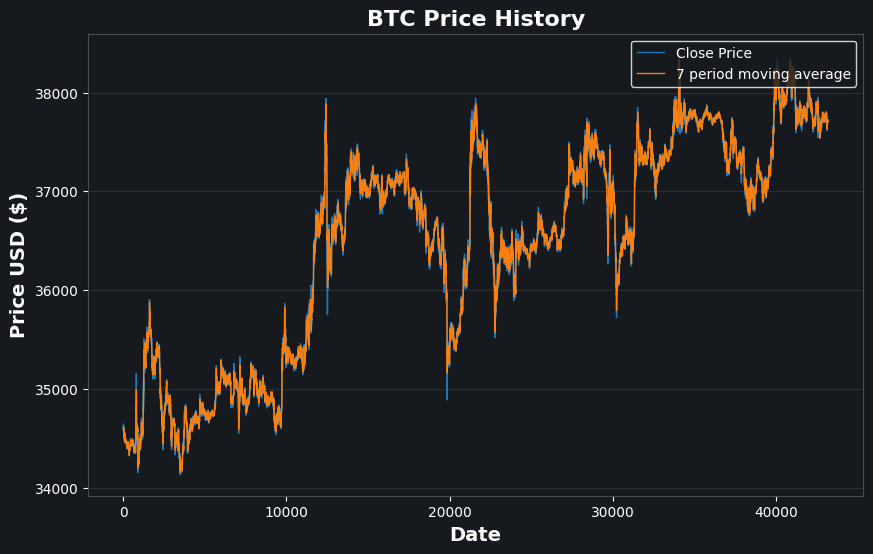

In [17]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.title('BTC Price History', fontsize=16, fontweight='semibold', color='white')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Price USD ($)', fontsize=14, fontweight='bold', color='white')

# Plotting stock 'Close' prices
plt.plot(data_BTC['close'], label='Close Price')
plt.plot(data_BTC['MA7'], label='7 period moving average')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.show()

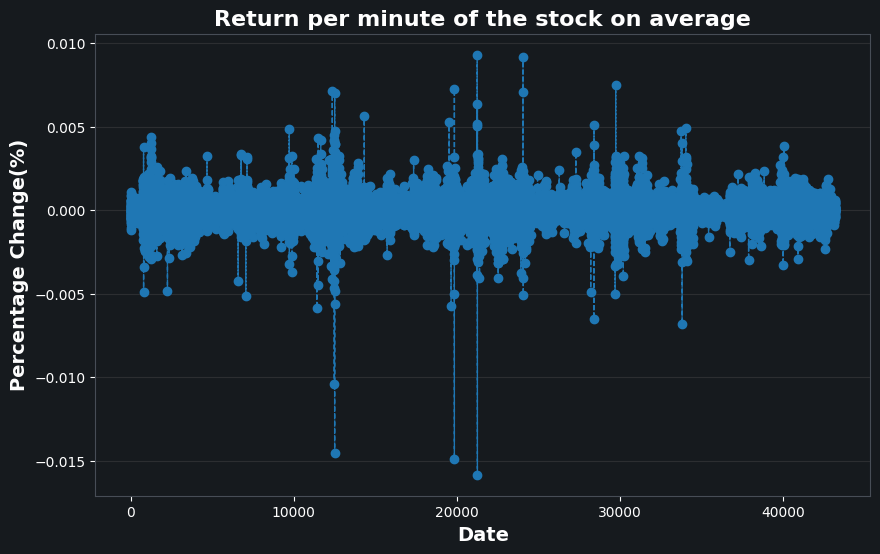

In [18]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.title('Return per minute of the stock on average', fontsize=16, fontweight='semibold', color='white')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Percentage Change(%)', fontsize=14, fontweight='bold', color='white')

# Plotting stock 'Close' prices
plt.plot(data_BTC['Return'],linestyle='--', marker='o')
plt.show()


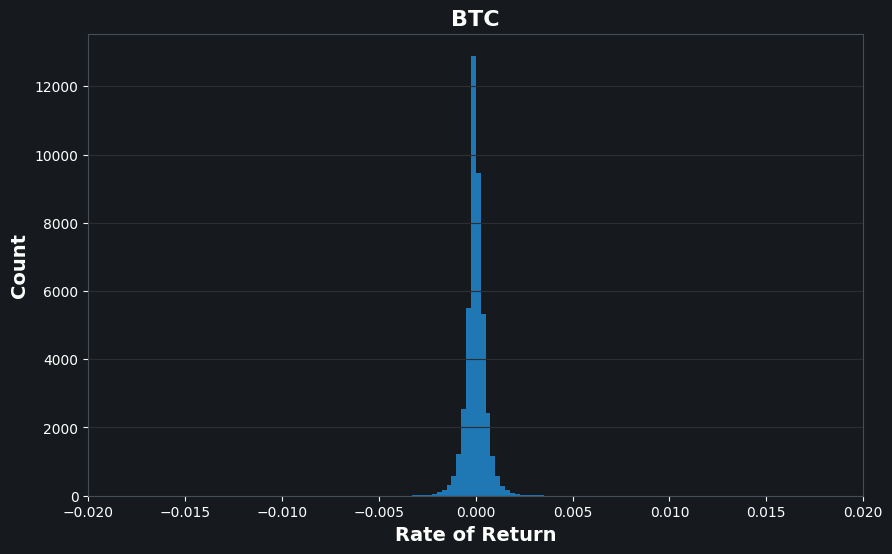

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data_BTC['Return'], bins=100)
plt.xlim(-0.02, 0.02)
plt.xlabel('Rate of Return', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='white')
plt.title('BTC', fontsize=16, fontweight='semibold', color='white')
plt.show()

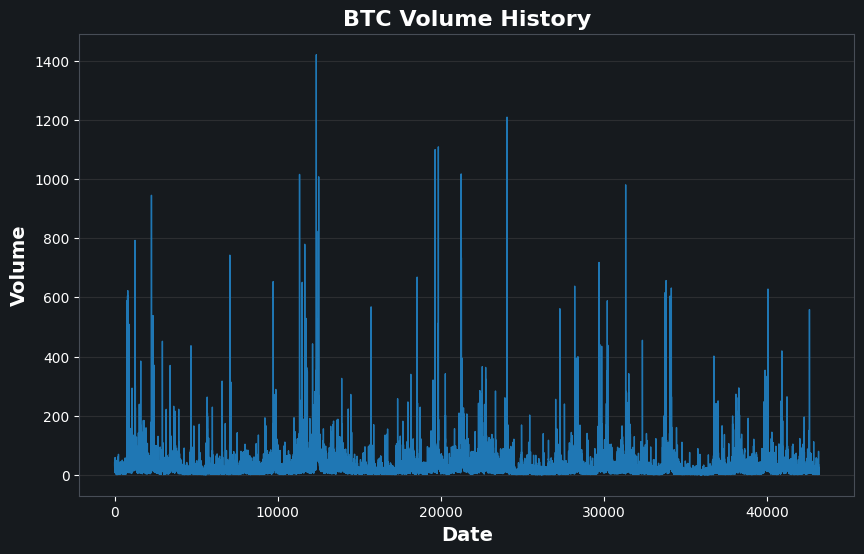

In [20]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.title('BTC Volume History', fontsize=16, fontweight='semibold', color='white')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Volume', fontsize=14, fontweight='bold', color='white')

# Plotting stock 'Close' prices
plt.plot(data_BTC['volume'])
plt.show()


In [21]:
def check_stationarity(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


In [22]:
# Stationarity check
check_stationarity(data_BTC['close'])

ADF Statistic: -2.149680
p-value: 0.225013
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


In [23]:
# Stationarity check of the first difference of time series
check_stationarity(data_BTC['close'].diff().dropna())


ADF Statistic: -27.638837
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


In [24]:
# Stationarity check of the second difference of time series
check_stationarity(data_BTC['close'].diff().diff().dropna())

ADF Statistic: -50.104169
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


In [25]:


data_BTC.drop(columns=['close_time', 'ignore'], inplace=True)



In [26]:
data_BTC.head()

,open_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,Return,MA7,Volatility,Upper_Shadow,Lower_Shadow,high2low
7,2023-11-01 00:07:00,34605.63,34659.78,34605.63,34642.55,31.31887,1.084790e+06,1407,22.58995,782377.736755,0.001067,34616.365714,0.000682,17.23,0.00,1.001565
8,2023-11-01 00:08:00,34642.54,34649.08,34619.41,34626.26,44.49034,1.540917e+06,1707,16.75875,580426.857177,-0.000470,34616.148571,0.000636,6.54,6.85,1.000857
9,2023-11-01 00:09:00,34626.25,34640.00,34593.67,34597.80,27.41179,9.489730e+05,1270,9.29653,321834.113815,-0.000822,34610.498571,0.000688,13.75,4.13,1.001339
10,2023-11-01 00:10:00,34597.80,34597.80,34580.12,34589.00,23.19815,8.024361e+05,1150,6.11312,211423.230905,-0.000254,34607.682857,0.000628,0.00,8.88,1.000511
11,2023-11-01 00:11:00,34589.00,34590.37,34571.45,34581.17,37.96017,1.312725e+06,1083,16.19534,560038.019415,-0.000226,34604.788571,0.000628,1.37,9.72,1.000547


# Correlation Analysis

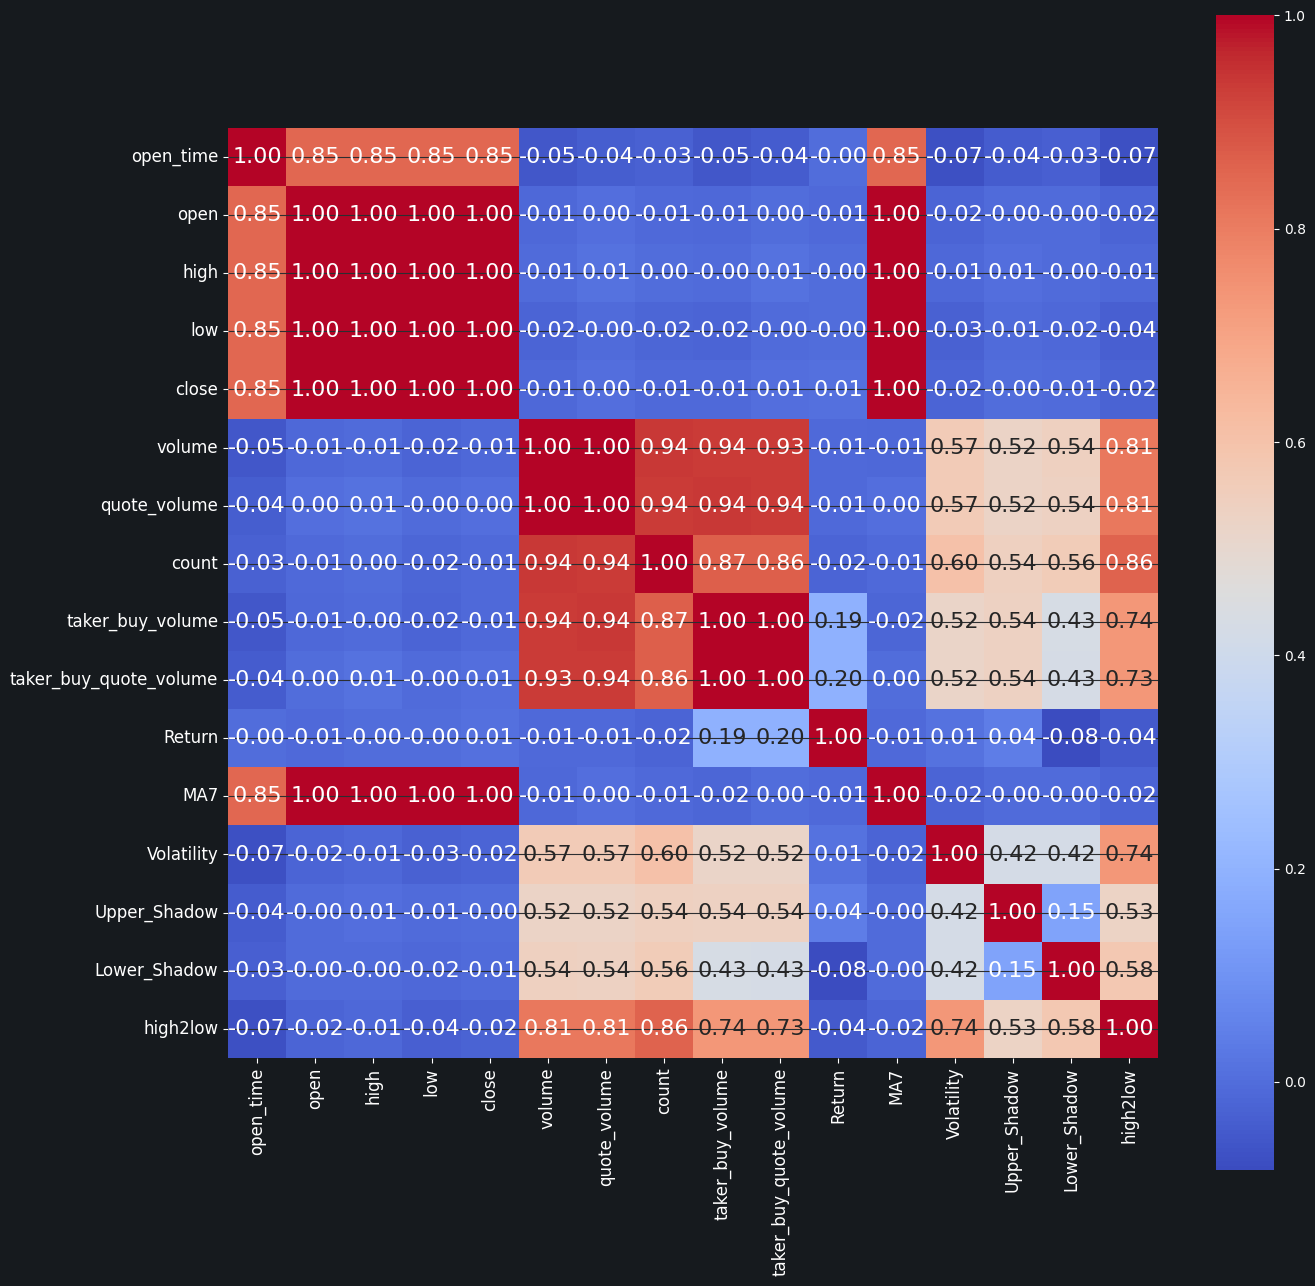

In [27]:
corr_matrix = data_BTC.corr()
plt.figure(figsize=(15, 15))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, annot_kws={"size": 16})  # Create the heatmap
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()  # Display the plot

# Data Splitting

In [28]:
data_for_us = data_BTC.copy() #To be used later on Unsupervised Learning
training_start = int(len(data_BTC) * 0.2)

train = data_BTC.iloc[training_start:]
test = data_BTC.iloc[:training_start]
print("Total datasets' lenght: ",train.shape, test.shape)

Total datasets' lenght:  (34555, 16) (8638, 16)


# Data Scaling 

In [29]:
scaler = MinMaxScaler().fit(train[['volume']])

In [30]:
def scale_samples(data,scaler):
    data['volume'] = scaler.transform(data[['volume']])
    return data

In [31]:
joblib.dump(scaler, 'scaler.gz')
scaler = joblib.load('scaler.gz')

In [32]:
train_scaler_close = scale_samples(train.copy(),scaler)
train_close = train_scaler_close[['volume']]

In [33]:
train_close.head()

,volume
8645,0.007840
8646,0.013512
8647,0.007702
8648,0.008195
8649,0.007543


In [34]:
test_scaler_close = scale_samples(test.copy(),scaler)
test_close = test_scaler_close[['volume']]

In [35]:
test_close.head()


,volume
7,0.021616
8,0.030895
9,0.018863
10,0.015895
11,0.026294


## Sequences generation and dataset creation

In [36]:
def shift_samples(data,column_name,lookback=24):
    """This function takes a *data* dataframe and returns two numpy arrays:
    - X corresponds to the same values but packed into n frames of *lookback* values each
    - Y corresponds to the sample shifted *lookback* steps to the future
    """
    data_x = []
    data_y = []
    for i in range(len(data) - int(lookback)):
        x_floats = np.array(data.iloc[i:i+lookback])
        y_floats = np.array(data.iloc[i+lookback])
        data_x.append(x_floats)
        data_y.append(y_floats)
    return np.array(data_x), np.array(data_y)

In [37]:
X_train, y_train = shift_samples(train_close[['volume']],train_close.columns[0])
X_test, y_test = shift_samples(test_close[['volume']], test_close.columns[0])
gc.collect()


36122

In [38]:
print("Final datasets' shapes:")
print('X_train: '+str(X_train.shape)+', y_train: '+str(y_train.shape))
print('X_test: '+str(X_test.shape)+', y_train: '+str(y_test.shape))

Final datasets' shapes:
X_train: (34531, 24, 1), y_train: (34531, 1)
X_test: (8614, 24, 1), y_train: (8614, 1)


In [39]:
tsteps = X_train.shape[1]
nfeatures = X_train.shape[2]

# Anomaly detectors' training

In [40]:
#First model - LSTM Autoencoder for anomaly detections

detector = Sequential()
detector.add(layers.LSTM(128, input_shape=(tsteps, nfeatures),dropout=0.2))
detector.add(layers.Dropout(rate=0.5))
detector.add(layers.RepeatVector(tsteps))
detector.add(layers.LSTM(128, return_sequences=True,dropout=0.2))
detector.add(layers.Dropout(rate=0.5))
detector.add(layers.TimeDistributed(layers.Dense(nfeatures)))

detector.compile(loss='mae', optimizer='adam')
detector.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 24, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 24, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="model_anomaly.keras",  # new extension
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_freq='epoch'
)

history1 = detector.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    verbose=1,
    validation_split=0.1,
    callbacks=[checkpoint],
    shuffle=False
)


Epoch 1/50
241/243 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126
Epoch 1: val_loss improved from inf to 0.01013, saving model to model_anomaly.keras
243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0125 - val_loss: 0.0101
Epoch 2/50
239/243 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107
Epoch 2: val_loss improved from 0.01013 to 0.00935, saving model to model_anomaly.keras
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 3/50
239/243 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104
Epoch 3: val_loss improved from 0.00935 to 0.00930, saving model to model_anomaly.keras
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 4/50
239/243 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102
Epoch 4: val_loss improved from 0.00930 to 0.00927, saving model to model_anomaly.keras
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 5/50
239/243 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102
Epoch 5: val_los

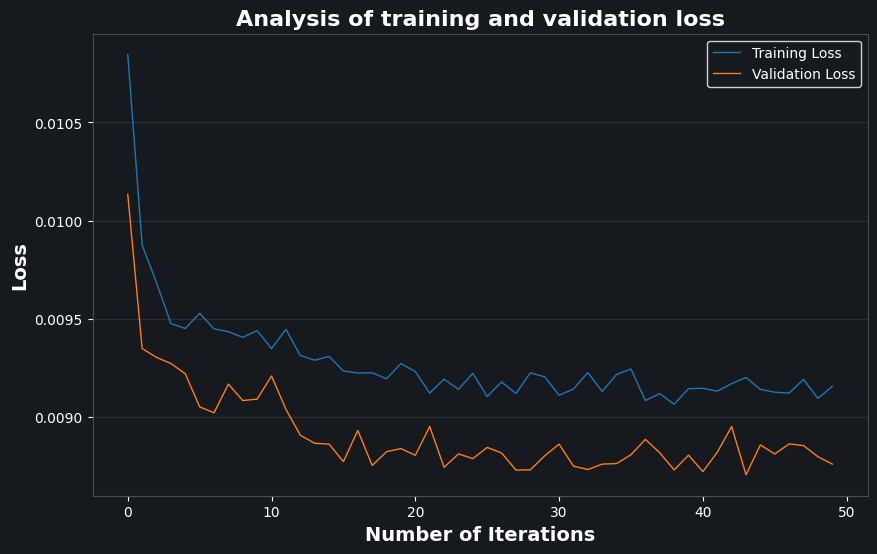

In [42]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.title('Analysis of training and validation loss', fontsize=16, fontweight='semibold', color='white')
plt.xlabel('Number of Iterations', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Loss', fontsize=14, fontweight='bold', color='white')

plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.show()


In [43]:


#Let's load the best model obtained during training
detector = load_model("/kaggle/working/model_anomaly.keras")
detector.evaluate(X_test, y_test)



270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0108


0.008883599191904068

## Determining threshold for Autoencoder detector

1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


<ipython-input-44-f480f79ef5fb>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='Density'>

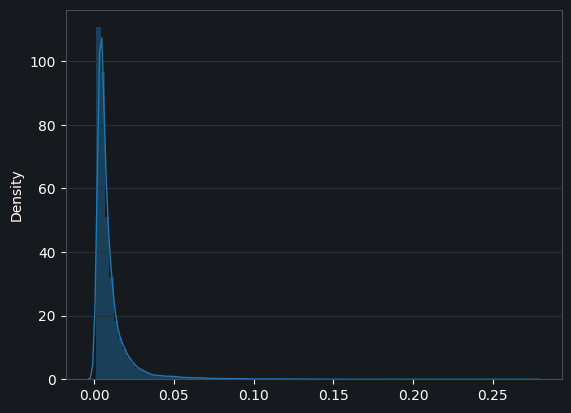

In [44]:
X_train_pred = detector.predict(X_train)
loss_mae = np.mean(np.abs(X_train_pred - X_train), axis=1) #This is the formula to calculate MAE
sns.distplot(loss_mae, bins=100, kde=True)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-45-9e7c23e9cb7e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='Density'>

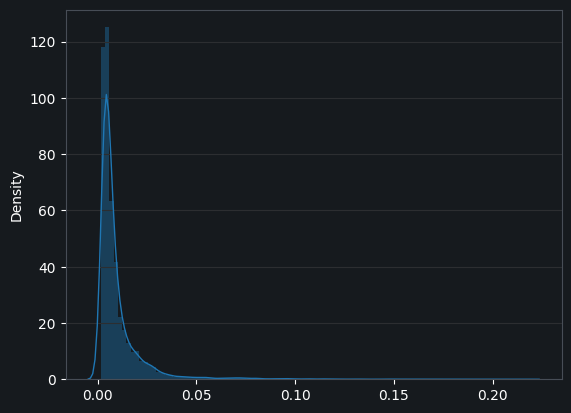

In [45]:
X_test_pred = detector.predict(X_test)
loss_mae = np.mean(np.abs(X_test_pred - X_test), axis=1)
sns.distplot(loss_mae, bins=100, kde=True)


In [46]:
threshold = 0.02

test_df = pd.DataFrame(test_close[tsteps:])
test_df['loss'] = loss_mae
test_df['threshold'] = threshold
test_df['anomaly'] = test_df.loss > test_df.threshold
test_df['close'] = test[tsteps:].close

In [47]:
anomalies = test_df[test_df.anomaly == True]
anomalies.head()

,volume,loss,threshold,anomaly,close
770,0.086088,0.020291,0.02,True,34592.13
772,0.081568,0.034546,0.02,True,34626.58
773,0.156810,0.029906,0.02,True,34679.68
774,0.356062,0.046301,0.02,True,34743.28
775,0.096813,0.119761,0.02,True,34780.82


In [48]:
yvals1 = scaler.inverse_transform(test_close[tsteps:][['volume']])
yvals1 = yvals1.reshape(-1)

In [49]:
yvals2 = scaler.inverse_transform(anomalies[['volume']])
yvals2 = yvals2.reshape(-1)


In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test[tsteps:].index, y=yvals1,mode='lines',name='BTC volume'))
fig.add_trace(go.Scatter(x=anomalies.index, y=yvals2,mode='markers',name='Anomaly'))
fig.update_layout(showlegend=True,title="BTC volume anomalies",xaxis_title="Time",yaxis_title="Prices",font=dict(family="Courier New, monospace"))
fig.show()

# Model Training for Forecasting

In [51]:
# Create new data with only the "Close" column
close = data_BTC.filter(["close"])
# Convert the dataframe to a np array
close_array = close.values
# See the train data len
train_close_len = math.ceil(len(close_array) * 0.8)
train_close_len


34555

In [52]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)
scaled_data

array([[0.12040783],
       [0.11657823],
       [0.1098876 ],
       ...,
       [0.84046397],
       [0.84046632],
       [0.84481312]])

In [53]:
train_data = scaled_data[0 : train_close_len, :]
# Create X_train and y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)

[array([0.12040783, 0.11657823, 0.1098876 , 0.10781882, 0.10597808,
       0.11100193, 0.10954437, 0.1075085 , 0.10745914, 0.11465756,
       0.1101509 , 0.10965016, 0.11317885, 0.11696613, 0.10827019,
       0.09883137, 0.09467735, 0.09939088, 0.09569529, 0.09169172,
       0.0932245 , 0.09541788, 0.09766768, 0.09520865, 0.09769354,
       0.09817548, 0.1027409 , 0.10335213, 0.10431365, 0.10942683,
       0.10692548, 0.10586288, 0.10561134, 0.09979289, 0.09428005,
       0.09024828, 0.0892468 , 0.08887301, 0.09568118, 0.09263208,
       0.0971834 , 0.09769354, 0.09390156, 0.09676964, 0.09395093,
       0.09089242, 0.08880013, 0.08829939, 0.09045045, 0.08712395,
       0.08795616, 0.0870111 , 0.08870139, 0.09091358, 0.09063617,
       0.08834641, 0.0900367 , 0.08880953, 0.08453797, 0.07926022])]
[0.08667727701230099]


In [54]:
#  make X_train and y_train np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(34495, 60, 1)

In [56]:
# create the testing dataset
test_data = scaled_data[train_close_len - 60 : , :]
# create X_test and y_test
X_test = []
y_test = data_BTC.iloc[train_close_len : , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60 : i, 0])


In [57]:
# convert the test data to a np array and reshape the test data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [58]:
# Build the LSTM Model
model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))


model.add(LSTM(units=256, activation='relu', return_sequences=False))


model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [59]:
# compile the LSTM model
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [60]:
# train the LSTM model
model.fit(X_train, y_train,
          epochs=3,
          batch_size=100,
          verbose=1)


Epoch 1/3
345/345 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - loss: 0.0115 - mae: 0.0396
Epoch 2/3
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 1.2342e-04 - mae: 0.0076
Epoch 3/3
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 1.0557e-04 - mae: 0.0072


In [61]:
# predict with LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<ipython-input-62-3cad0a436ffa>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



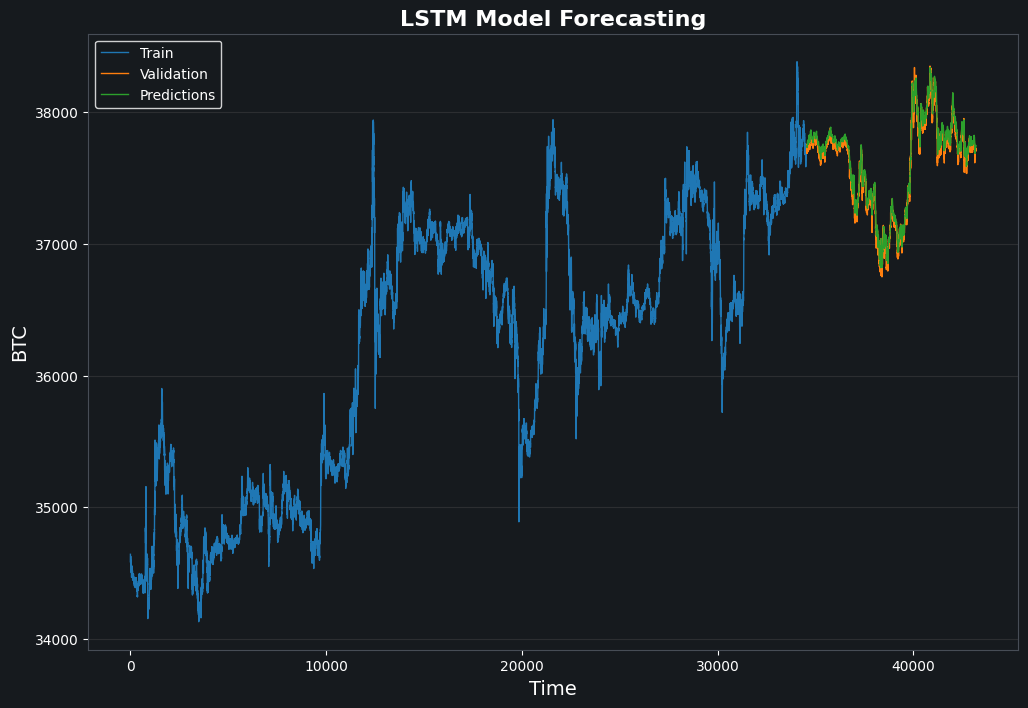

In [62]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = predictions
#visualize the data
plt.figure(figsize=(12, 8))
plt.title('LSTM Model Forecasting', fontsize=16, fontweight='semibold', color='white')
plt.xlabel("Time", fontsize=14)
plt.ylabel("BTC", fontsize=14)
plt.plot(data_BTC["close"][:train_close_len], label='Train')
plt.plot(valid["close"], label='Validation')
plt.plot(valid["Predictions"], label = 'Predictions')
plt.legend()
plt.show()

In [63]:
# change the parameters of first LSTM model and build the Optimized LSTM Model
optimized_model = Sequential()

optimized_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

optimized_model.add(LSTM(100, return_sequences=False))

optimized_model.add(Dense(50))

optimized_model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [64]:
# compile the model
optimized_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])


In [65]:
# train the optimized model
optimized_model.fit(X_train, y_train,
          batch_size=10,
          epochs=3,
          verbose=1)

Epoch 1/3
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.0032 - mae: 0.0178
Epoch 2/3
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 1.0332e-04 - mae: 0.0073
Epoch 3/3
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 5.0932e-05 - mae: 0.0052


In [66]:
# Predict with optimized LSTM model
o_predictions = optimized_model.predict(X_test)
o_predictions = scaler.inverse_transform(o_predictions)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<ipython-input-67-4e116d5a80d4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



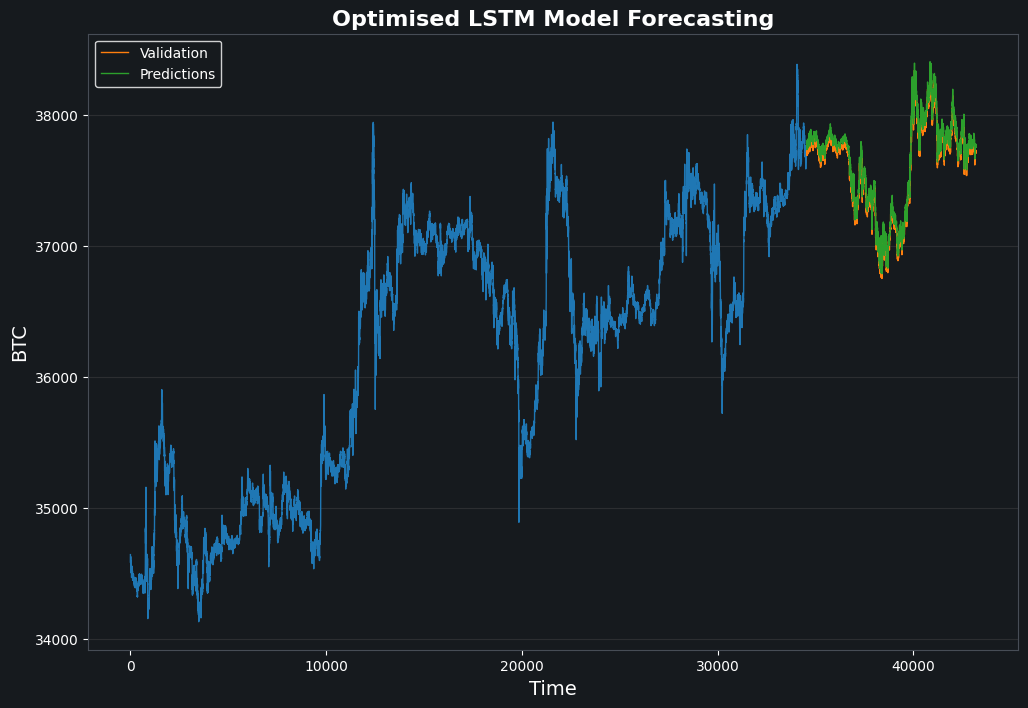

In [67]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = o_predictions
#visualize the data
plt.figure(figsize=(12, 8))
plt.title('Optimised LSTM Model Forecasting', fontsize=16, fontweight='semibold', color='white')
plt.xlabel("Time", fontsize=14)
plt.ylabel("BTC", fontsize=14)
plt.plot(data_BTC["close"][:train_close_len])
plt.plot(valid["close"], label='Validation')
plt.plot(valid["Predictions"], label = 'Predictions')
plt.legend()
plt.show()

# Model Building For Backtesting

In [68]:
data_BTC1 = data_BTC
# Create the 'Target' column: '1' if the return is positive, '0' if it is negative
data_BTC1['Target'] = (data_BTC1['Return'] > 0).astype(int)


In [69]:
# Define the feature columns
features = ['open', 'high', 'low', 'close', 'volume', 'quote_volume', 'count',
            'taker_buy_volume', 'taker_buy_quote_volume', 'Return', 'MA7', 'Volatility', 'Upper_Shadow', 'Lower_Shadow', 'high2low', 'Target']
# Define the target column
target = 'Target'
# Split the data into training set (70%) and testing set (30%)
train_data, test_data = train_test_split(data_BTC1, test_size=0.3, shuffle=False)
# Display the first 5 rows of the training data
train_data.head()

,open_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,Return,MA7,Volatility,Upper_Shadow,Lower_Shadow,high2low,Target
7,2023-11-01 00:07:00,34605.63,34659.78,34605.63,34642.55,31.31887,1.084790e+06,1407,22.58995,782377.736755,0.001067,34616.365714,0.000682,17.23,0.00,1.001565,1
8,2023-11-01 00:08:00,34642.54,34649.08,34619.41,34626.26,44.49034,1.540917e+06,1707,16.75875,580426.857177,-0.000470,34616.148571,0.000636,6.54,6.85,1.000857,0
9,2023-11-01 00:09:00,34626.25,34640.00,34593.67,34597.80,27.41179,9.489730e+05,1270,9.29653,321834.113815,-0.000822,34610.498571,0.000688,13.75,4.13,1.001339,0
10,2023-11-01 00:10:00,34597.80,34597.80,34580.12,34589.00,23.19815,8.024361e+05,1150,6.11312,211423.230905,-0.000254,34607.682857,0.000628,0.00,8.88,1.000511,0
11,2023-11-01 00:11:00,34589.00,34590.37,34571.45,34581.17,37.96017,1.312725e+06,1083,16.19534,560038.019415,-0.000226,34604.788571,0.000628,1.37,9.72,1.000547,0


In [70]:
# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Train the model using the training data
clf.fit(train_data[features], train_data[target])


RandomForestClassifier(random_state=0)

In [71]:
# Make predictions using the testing data
test_data['Predicted'] = clf.predict(test_data[features])

# Calculate the strategy returns
test_data['Strategy Return'] = test_data['Return'] * test_data['Predicted']

# Calculate the cumulative returns of the strategy
test_data['Cumulative Market Returns'] = np.cumsum(test_data['Return'])
test_data['Cumulative Strategy Returns'] = np.cumsum(test_data['Strategy Return'])

# Display the last 5 rows of the testing data
test_data.tail()

,open_time,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,...,MA7,Volatility,Upper_Shadow,Lower_Shadow,high2low,Target,Predicted,Strategy Return,Cumulative Market Returns,Cumulative Strategy Returns
43195,2023-11-30 23:55:00,37708.85,37708.86,37708.85,37708.86,4.41992,166670.117808,265,1.75157,66049.707910,...,37715.447143,0.000194,0.00,0.00,1.000000,0,0,0.000000e+00,0.052257,1.967312
43196,2023-11-30 23:56:00,37708.85,37708.86,37708.85,37708.86,4.47888,168893.418749,221,0.46607,17574.968380,...,37712.448571,0.000167,0.00,0.00,1.000000,0,0,0.000000e+00,0.052257,1.967312
43197,2023-11-30 23:57:00,37708.86,37708.86,37705.45,37705.46,5.24001,197584.465271,357,1.74625,65844.767910,...,37708.964286,0.000163,0.00,0.01,1.000090,0,0,-0.000000e+00,0.052167,1.967312
43198,2023-11-30 23:58:00,37705.45,37705.47,37705.45,37705.47,4.13830,156036.523332,235,3.64117,137292.008899,...,37707.888571,0.000049,0.00,0.00,1.000001,1,1,2.652136e-07,0.052167,1.967313
43199,2023-11-30 23:59:00,37705.46,37723.97,37705.46,37723.96,17.13650,646185.000793,594,15.45451,582762.824875,...,37710.045714,0.000194,0.01,0.00,1.000491,1,1,4.903798e-04,0.052657,1.967803


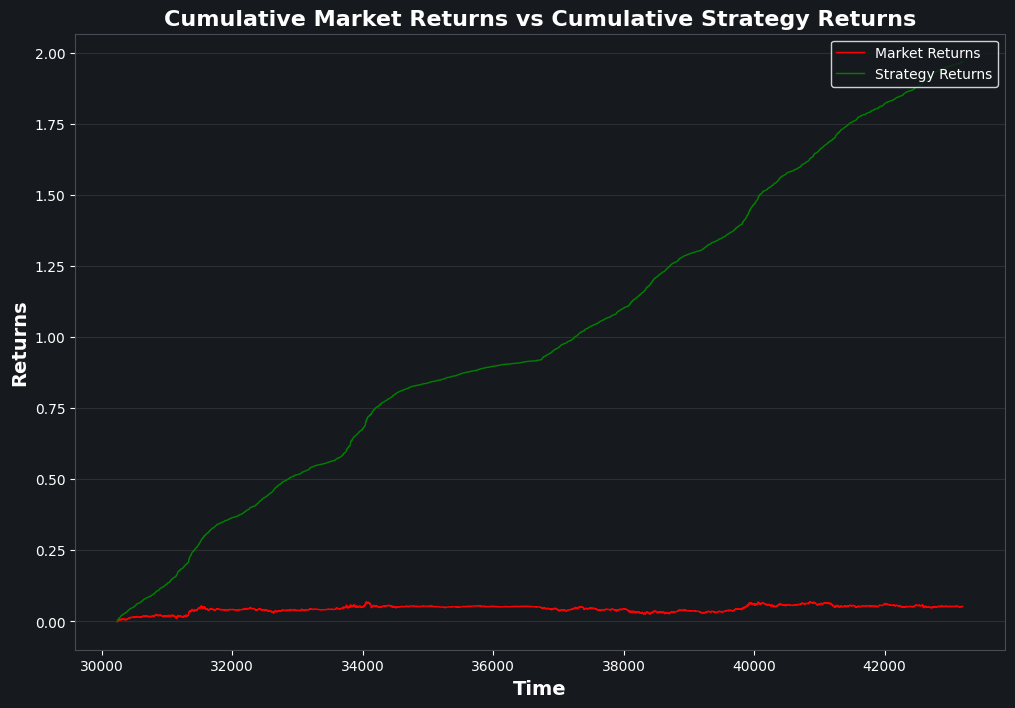

In [72]:
plt.style.use({
    "axes.grid": True,
    "axes.grid.axis": "y",
    "axes.edgecolor": "#474d56",
    "axes.facecolor": "#161a1e",
    "grid.color": "#2c2e31",
    "axes.titlecolor": "red",
    "figure.facecolor": "#161a1e",
    "figure.titlesize": "x-large",
    "figure.titleweight": "semibold",
    "lines.linewidth": 1.0,
    "lines.linestyle": "-",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "legend.edgecolor": "white",
    "legend.facecolor": "#161a1e",
    "legend.fontsize": "medium",
    "legend.shadow": False,
    "text.color": "white"
})
# Plotting using Matplotlib
plt.figure(figsize=(12, 8))
plt.title('Cumulative Market Returns vs Cumulative Strategy Returns', fontsize=16, fontweight='semibold', color='white')
plt.xlabel('Time', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Returns', fontsize=14, fontweight='bold', color='white')

plt.plot(test_data['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(test_data['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.show()